In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
x = pd.read_csv("titanic.csv", delimiter=',')

# Подготовка данных

In [3]:
x.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
x.drop([ 'Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True) #удаляем неинформативные столбцы

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Два столбца, где есть пропуски - Age, Embarked

In [6]:
x['Sex'] = x['Sex'].replace({'male': 1, 'female': 0})

In [7]:
for i in set(x.Pclass):
    x.loc[(x['Pclass']==i)&(x['Age'].isnull()),'Age'] = x[x['Pclass']==i]['Age'].median()

In [8]:
x['Embarked'].fillna('S', inplace=True) # Заменяем на самое частое значение

In [9]:
x =  pd.get_dummies(x, columns = ['Embarked'], prefix="Embarked")
x =  pd.get_dummies(x, columns = ['Pclass'], prefix="Pclass")

In [10]:
x.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1
5,0,1,24.0,0,0,8.4583,0,1,0,0,0,1
6,0,1,54.0,0,0,51.8625,0,0,1,1,0,0
7,0,1,2.0,3,1,21.0750,0,0,1,0,0,1
8,1,0,27.0,0,2,11.1333,0,0,1,0,0,1
9,1,0,14.0,1,0,30.0708,1,0,0,0,1,0


In [11]:
x_train = x.head(np.floor(x.shape[0] * 0.75).astype(int))
x_test = x.tail(np.floor(x.shape[0] * 0.25).astype(int))

In [12]:
y_train = x_train.Survived
x_train.drop('Survived', axis=1, inplace=True)

C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
y_test = x_test.Survived
x_test.drop('Survived', axis=1, inplace=True)

# Дерево решений

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [15]:
clf_tree = DecisionTreeClassifier(max_depth=5)

In [16]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_pred_tree = clf_tree.predict(x_test)
y_pred_proba_tree = clf_tree.predict_proba(x_test)

In [18]:
metrics.roc_auc_score(y_test, y_pred_proba_tree[:,1])

0.8953397212543553

# Логистическая регрессия

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [20]:
clf_log = LogisticRegression(random_state=0)

In [21]:
clf_log.fit(x_train, y_train)

C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred_log = clf_log.predict(x_test)
y_pred_proba_log = clf_log.predict_proba(x_test)

In [23]:
metrics.roc_auc_score(y_test, y_pred_proba_log[:,1])

0.8761759581881532

# Модель KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [25]:
cls_KNN = KNeighborsClassifier( n_neighbors = 2 )

In [26]:
cls_KNN.fit( x_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [27]:
y_pred_KNN = cls_KNN.predict(x_test)
y_pred_proba_KNN = cls_KNN.predict_proba(x_test)

In [28]:
metrics.roc_auc_score(y_test, y_pred_proba_KNN[:,1])

0.6830574912891986

# Графики ROC кривых

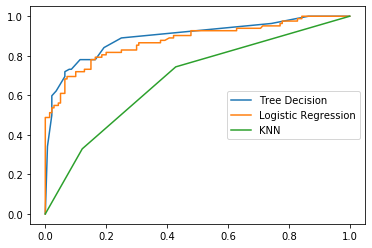

In [29]:
Y_predict_proba = {"Tree Decision": y_pred_proba_tree, "Logistic Regression": y_pred_proba_log, "KNN": y_pred_proba_KNN}
for name, y_pred_proba in Y_predict_proba.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:,1])
    plt.plot(fpr,tpr,label= name)
    plt.legend(loc=5)
plt.show()

Как видно по значениям и графикам ROC-AUC метрики, дерево решений лучше всего подходит для решения данной задачи классификации 